In [1]:
import pandas as pd
df1 = pd.read_excel('cwc2025_GK.xlsx')
print(df1)

                  Player  Nation Pos         Club  Age  Born  MP  Starts  Min   
0    Michele Di Gregorio  it ITA  GK     Juventus   27  1997   4       4  360  \
1         Yassine Bounou  ma MAR  GK     Al-Hilal   33  1991   5       5  480   
2       Thibaut Courtois  be BEL  GK  Real Madrid   32  1992   6       6  540   
3           Gregor Kobel  ch SUI  GK     Dortmund   27  1997   5       5  450   
4         Robert Sánchez  es ESP  GK      Chelsea   27  1997   6       6  570   
5                  Fábio  br BRA  GK   Fluminense   44  1980   6       6  540   
6   Gianluigi Donnarumma  it ITA  GK    Paris S-G   25  1999   7       7  630   
7        Anatolii Trubin  ua UKR  GK      Benfica   23  2001   4       4  390   
8               Wéverton  br BRA  GK    Palmeiras   37  1987   5       5  480   
9        Esteban Andrada  ar ARG  GK    Monterrey   34  1991   4       4  360   
10       Ronwen Williams  za RSA  GK     Sundowns   33  1992   3       3  270   

    90s  GA  GA90  ShotOnTa

In [2]:
df2 = pd.read_excel('cwc2025_defenders.xlsx')
print(df2)

                    Player   Nation Pos            Squad  Age  90s  Fls  Crs   
0        Alexander Barboza   ar ARG  DF         Botafogo   29  4.3    5    0  \
1              Fran Garcia   es ESP  DF      Real Madrid   25  6.0    7   11   
2               João Neves   pt POR  MF        Paris S-G   20  5.7    6    0   
3           Moisés Caicedo   ec ECU  MF          Chelsea   23  5.2   14    1   
4                 Hércules   br BRA  MF       Fluminense   24  4.4    2    0   
5               Javi Galán   es ESP  DF  Atlético Madrid   30  2.7    3   11   
6              Nuno Mendes   pt POR  DF        Paris S-G   22  5.9    8   22   
7           Marc Cucurella   es ESP  DF          Chelsea   26  6.3   13    5   
8              Désiré Doué   fr FRA  FW        Paris S-G   19  6.1    8   24   
9               Malo Gusto   fr FRA  DF          Chelsea   21  5.6    7   11   
10            Richard Ríos   co COL  MF        Palmeiras   24  5.2   11    5   
11         Jude Bellingham  eng ENG  MF 

In [3]:
df3 = pd.read_excel('cwc2025_attackers.xlsx')
print(df3)

                   Player   Nation Pos            Squad  Age  Born  90s  Gls   
0         Serhou Guirassy   gn GUI  FW         Dortmund   28  1996  4.8    4  \
1   Khvicha Kvaratskhelia   ge GEO  FW        Paris S-G   23  2001  5.7    1   
2       Federico Valverde   uy URU  MF      Real Madrid   26  1998  5.8    2   
3          Erling Haaland   no NOR  FW  Manchester City   24  2000  2.8    3   
4          Ángel Di María   ar ARG  MF          Benfica   36  1988  4.1    4   
5           Michael Olise   fr FRA  MF    Bayern Munich   23  2001  4.0    3   
6             Cole Palmer  eng ENG  MF          Chelsea   22  2002  6.2    3   
7             Désiré Doué   fr FRA  FW        Paris S-G   19  2005  6.1    1   
8          Gonzalo García   es ESP  FW      Real Madrid   20  2004  5.0    4   
9             Jeremy Doku   be BEL  FW  Manchester City   22  2002  2.7    2   
10           Lionel Messi   ar ARG  FW      Inter Miami   37  1987  4.0    1   
11             Phil Foden  eng ENG  MF  

Top 10 goalkeepers by number of saves during the Club World Cup 2025

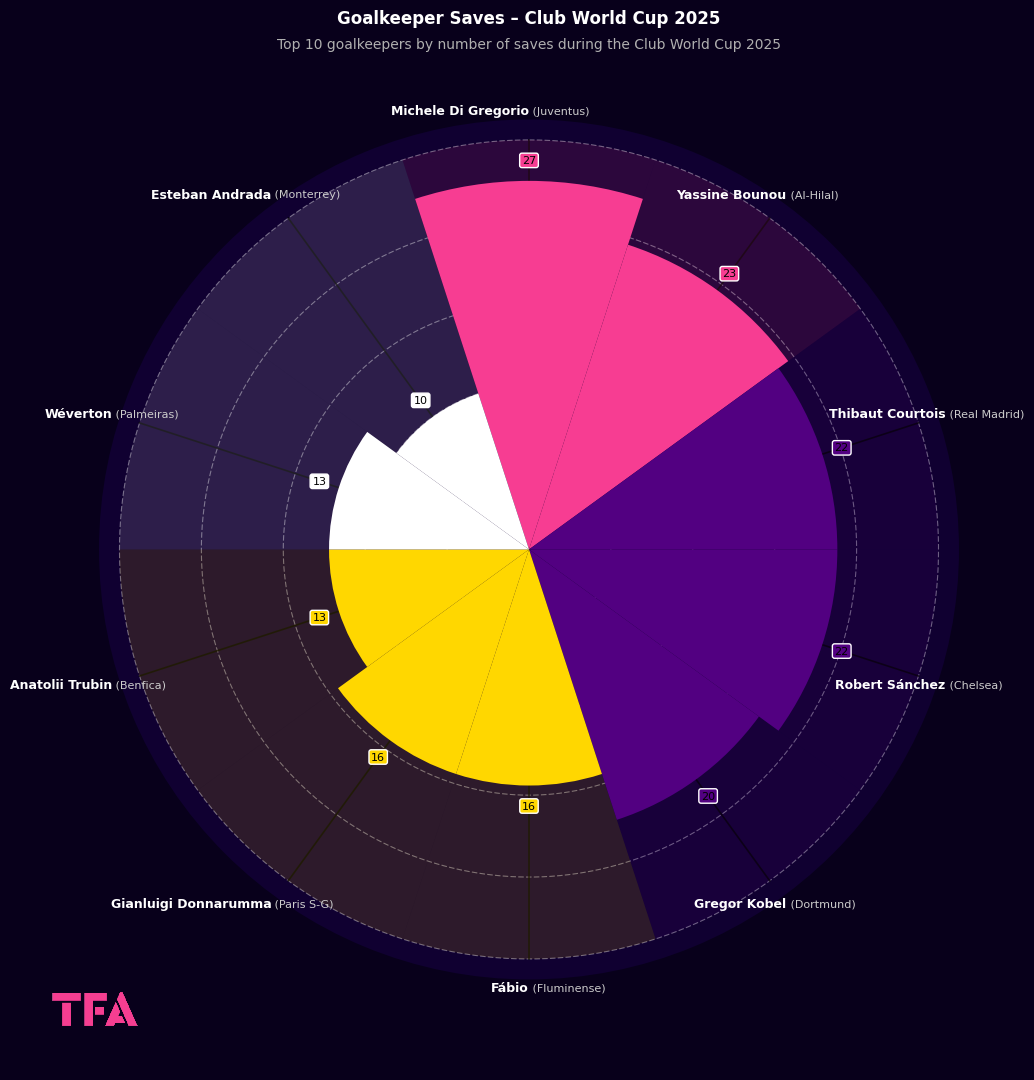

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

df = df1.copy()
df = df.sort_values(by="Saves", ascending=False).reset_index(drop=True)
df = df.iloc[:10]

metrics = df["Player"].tolist()
clubs = df["Club"].tolist()
values = df["Saves"].tolist()

data = {
    "Metric": metrics,
    "Value": values,
    "Club": clubs
}

df = pd.DataFrame(data)

scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])
norm_values = df["Normalized"].tolist()
norm_values += norm_values[:1]

custom_colors = [
    "#F73D92", "#F73D92",          
    "#520081", "#520081", "#520081", 
    "#FFD700", "#FFD700", "#FFD700",  
    "#FFFFFF", "#FFFFFF"          
]
colors = custom_colors + [custom_colors[0]]

angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=norm_values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        norm_values[i] + 0.05,
        f"{df['Value'][i]}",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black',
        zorder=4
    )

for i in range(len(df)):
    angle = angles[i]
    ax.text(
        angle,
        1.07,
        df["Metric"][i],
        ha='right',
        va='center',
        fontsize=9,
        fontweight='bold',
        color='white',
        zorder=4
    )
    ax.text(
        angle,
        1.07,
        f" ({df['Club'][i]})",
        ha='left',
        va='center',
        fontsize=8,
        fontname='DejaVu Sans',
        color='#CCCCCC',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Goalkeeper Saves – Club World Cup 2025",
             color='white', fontsize=12, weight='bold', y=1.07)

plt.text(0.5, 1.035,
         "Top 10 goalkeepers by number of saves during the Club World Cup 2025",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()

Top 10 goalkeepers by clean sheet percentage during the Club World Cup 2025

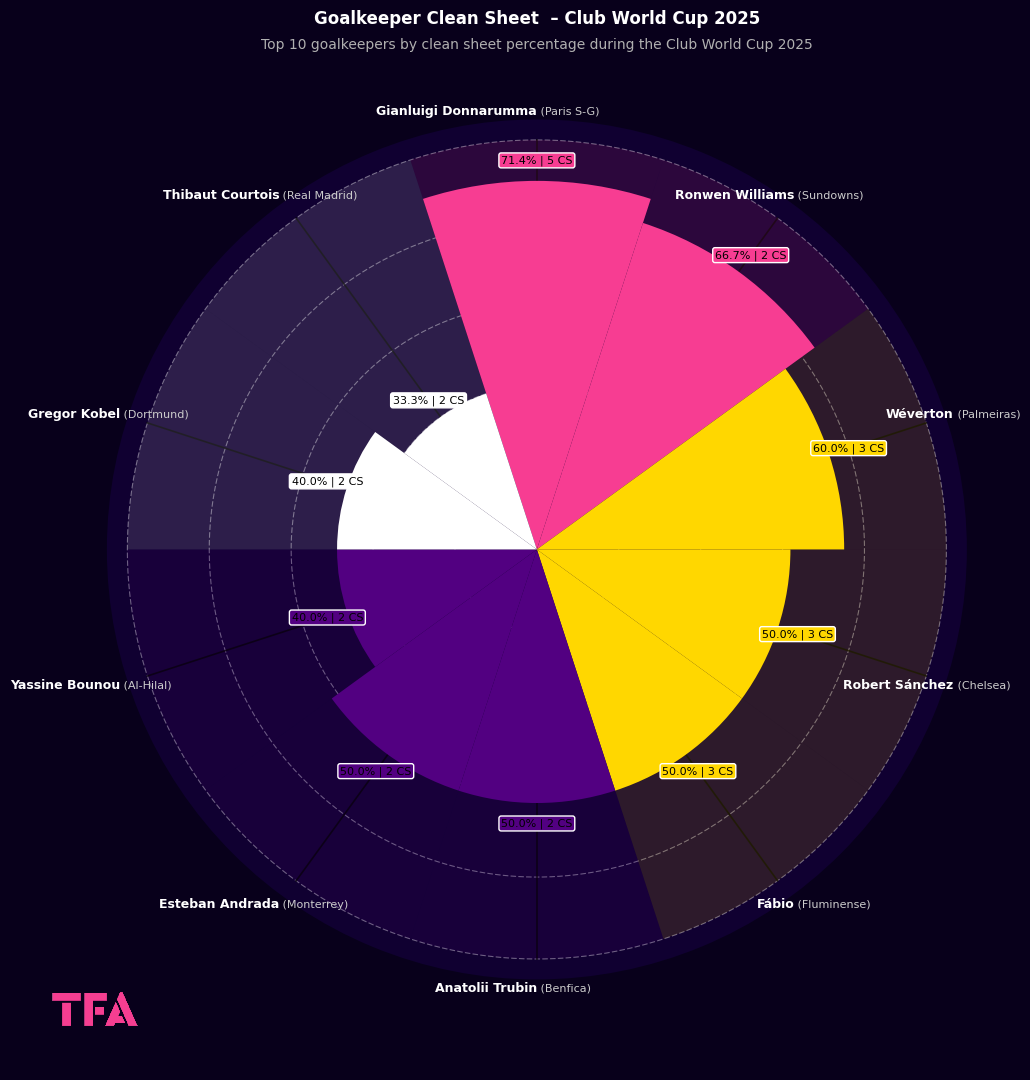

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

df = df1.copy()
df = df.sort_values(by="CS%", ascending=False).reset_index(drop=True)
df = df.iloc[:10]

metrics = df["Player"].tolist()
clubs = df["Club"].tolist()
values = df["CS%"].tolist()
cs_counts = df["CS"].tolist()

data = {
    "Metric": metrics,
    "Value": values,
    "Club": clubs,
    "CS": cs_counts
}

df = pd.DataFrame(data)

scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])
norm_values = df["Normalized"].tolist()
norm_values += norm_values[:1]

colors = ["#F73D92"] * 2 + ["#FFD700"] * 3 + ["#520081"] * 3 + ["#FFFFFF"] * 2
colors += [colors[0]]

angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=norm_values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        norm_values[i] + 0.05,
        f"{df['Value'][i]:.1f}% | {df['CS'][i]} CS",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black' if colors[i] != "#FFFFFF" else 'black',
        zorder=4
    )

for i in range(len(df)):
    angle = angles[i]
    ax.text(
        angle,
        1.07,
        df["Metric"][i],
        ha='right',
        va='center',
        fontsize=9,
        fontweight='bold',
        color='white',
        zorder=4
    )
    ax.text(
        angle,
        1.07,
        f" ({df['Club'][i]})",
        ha='left',
        va='center',
        fontsize=8,
        fontname='DejaVu Sans',
        color='#CCCCCC',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Goalkeeper Clean Sheet  – Club World Cup 2025",
             color='white', fontsize=12, weight='bold', y=1.07)

plt.text(0.5, 1.035,
         "Top 10 goalkeepers by clean sheet percentage during the Club World Cup 2025",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()

Top 10 defenders by interceptions during the Club World Cup 2025

In [4]:
df2.head()

,Player,Nation,Pos,Squad,Age,90s,Fls,Crs,Int,TklWon
0,Alexander Barboza,ar ARG,DF,Botafogo,29,4.3,5,0,5,15
1,Fran Garcia,es ESP,DF,Real Madrid,25,6.0,7,11,4,12
2,João Neves,pt POR,MF,Paris S-G,20,5.7,6,0,4,12
3,Moisés Caicedo,ec ECU,MF,Chelsea,23,5.2,14,1,3,10
4,Hércules,br BRA,MF,Fluminense,24,4.4,2,0,5,10


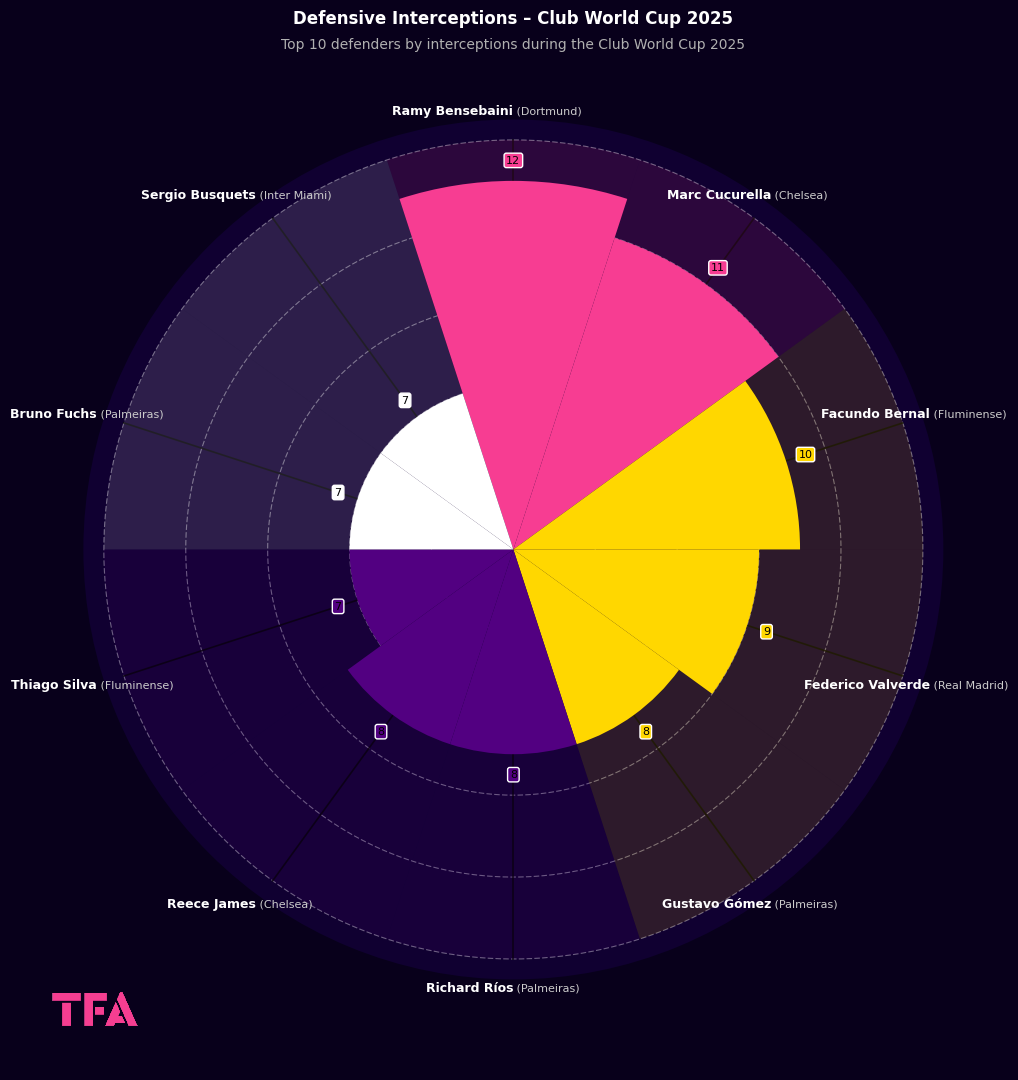

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

df = df2.copy()
df = df.sort_values(by="Int", ascending=False).reset_index(drop=True)
df = df.iloc[:10]

metrics = df["Player"].tolist()
clubs = df["Squad"].tolist()
values = df["Int"].tolist()

data = {
    "Metric": metrics,
    "Value": values,
    "Squad": clubs
}

df = pd.DataFrame(data)

scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])
norm_values = df["Normalized"].tolist()
norm_values += norm_values[:1]

colors = ["#F73D92"] * 2 + ["#FFD700"] * 3 + ["#520081"] * 3 + ["#FFFFFF"] * 2
colors += [colors[0]]

angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=norm_values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        norm_values[i] + 0.05,
        f"{df['Value'][i]}",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black' if colors[i] != "#FFFFFF" else 'black',
        zorder=4
    )

for i in range(len(df)):
    angle = angles[i]
    ax.text(
        angle,
        1.07,
        df["Metric"][i],
        ha='right',
        va='center',
        fontsize=9,
        fontweight='bold',
        color='white',
        zorder=4
    )
    ax.text(
        angle,
        1.07,
        f" ({df['Squad'][i]})",
        ha='left',
        va='center',
        fontsize=8,
        fontname='DejaVu Sans',
        color='#CCCCCC',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Defensive Interceptions – Club World Cup 2025",
             color='white', fontsize=12, weight='bold', y=1.07)

plt.text(0.5, 1.035,
         "Top 10 defenders by interceptions during the Club World Cup 2025",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()

Top 20 defenders by tackles won and foul count during the Club World Cup 2025

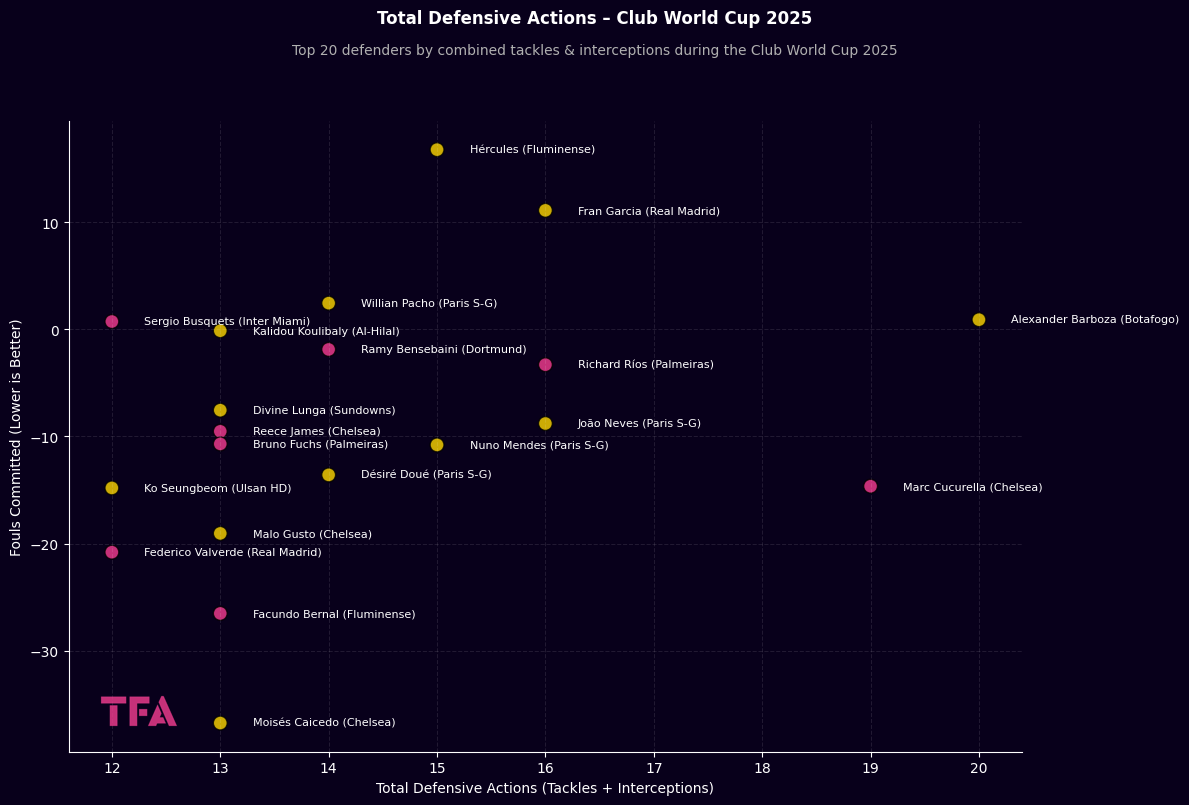

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

df_top = df2.copy()
df_top['DefActions'] = df_top['TklWon'] + df_top['Int']
df_top = df_top.sort_values(by='DefActions', ascending=False).head(20).reset_index(drop=True)
top10_int = df2.sort_values(by='Int', ascending=False).head(10)['Player'].tolist()
colors = ['#F73D92' if player in top10_int else '#FFD700' for player in df_top['Player']]

np.random.seed(42)
jitter = np.random.normal(0, 11.9, size=len(df_top))
df_top['Fls_jittered'] = -df_top['Fls'] + jitter

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#08001B')
fig.patch.set_facecolor('#08001B')

ax.scatter(
    df_top['DefActions'],
    df_top['Fls_jittered'],
    c=colors,
    s=100,
    alpha=0.8,
    edgecolors='black'
)

for i, row in df_top.iterrows():
    ax.text(
        row['DefActions'] + 0.3,
        row['Fls_jittered'],
        f"{row['Player']} ({row['Squad']})",
        fontsize=8,
        ha='left',
        va='center',
        color='white'
    )

ax.set_xlabel('Total Defensive Actions (Tackles + Interceptions)', color='white')
ax.set_ylabel('Fouls Committed (Lower is Better)', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.grid(color='white', linestyle='--', alpha=0.1)

plt.suptitle("Total Defensive Actions – Club World Cup 2025",
             color='white', fontsize=12, weight='bold', y=1.001)

plt.text(0.5, 0.95,
         "Top 20 defenders by combined tackles & interceptions during the Club World Cup 2025",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(logo_path):
    tfa_logo = Image.open(logo_path).convert("RGBA")
    logo_width, logo_height = tfa_logo.size
    tfa_logo = tfa_logo.resize((int(logo_width * 0.25), int(logo_height * 0.25)))
    fig.figimage(tfa_logo, xo=89, yo=44, alpha=0.8, zorder=3)

plt.tight_layout()
plt.show()

Top 10 attackers by shots on target per 90 during the Club World Cup 2025

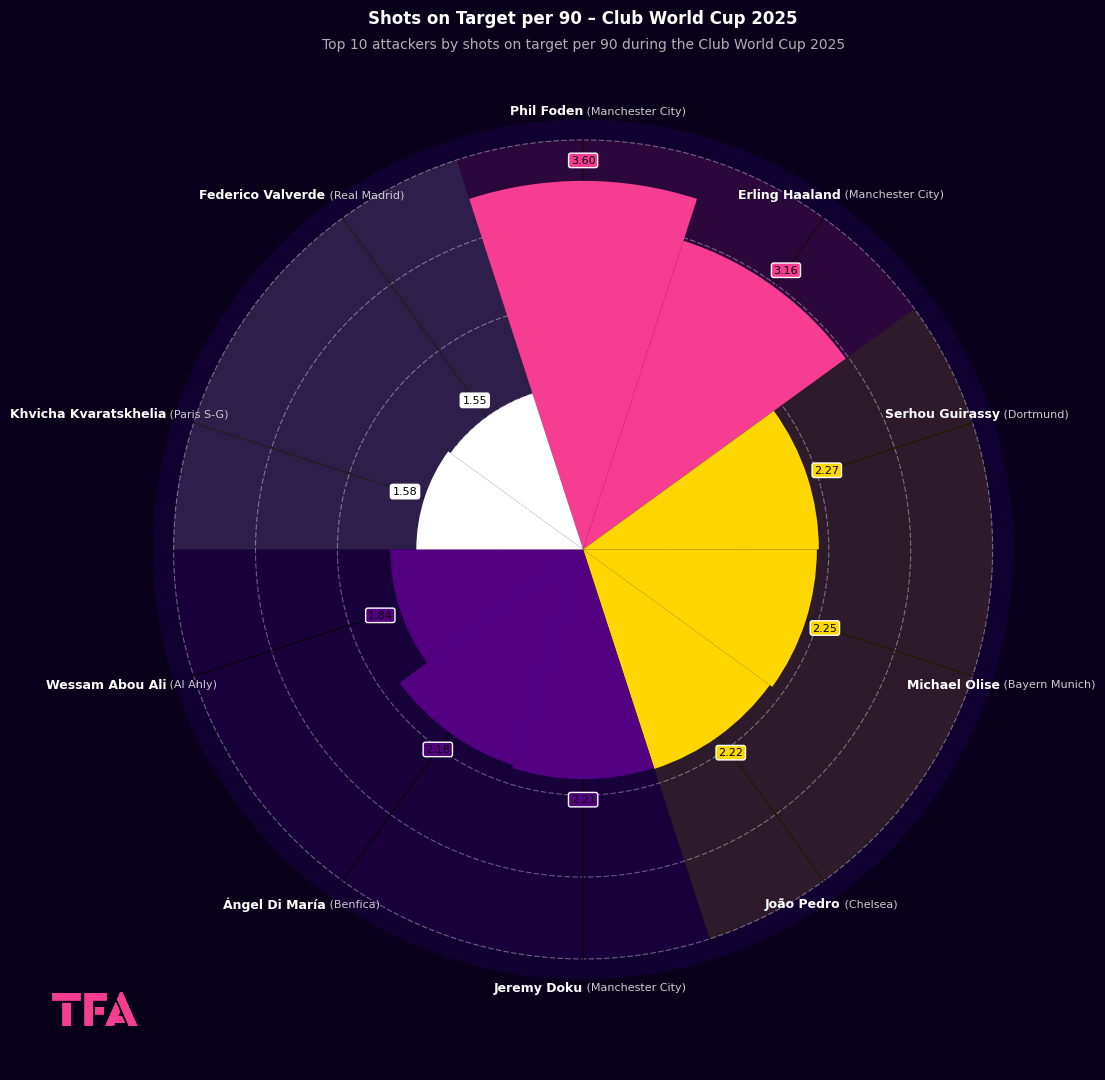

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

df = df3.copy()
df["Rate"] = df3["ShotOnTarget/90"]
df = df.sort_values(by="Rate", ascending=False).reset_index(drop=True)
df = df.iloc[:10]

metrics = df["Player"].tolist()
clubs = df["Squad"].tolist()
values = df["Rate"].tolist()

data = {
    "Metric": metrics,
    "Value": values,
    "Squad": clubs
}

df = pd.DataFrame(data)

scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])
norm_values = df["Normalized"].tolist()
norm_values += norm_values[:1]

colors = ["#F73D92"] * 2 + ["#FFD700"] * 3 + ["#520081"] * 3 + ["#FFFFFF"] * 2
colors += [colors[0]]

angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=norm_values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        norm_values[i] + 0.05,
        f"{df['Value'][i]:.2f}",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black' if colors[i] != "#FFFFFF" else 'black',
        zorder=4
    )

for i in range(len(df)):
    angle = angles[i]
    ax.text(
        angle,
        1.07,
        df["Metric"][i],
        ha='right',
        va='center',
        fontsize=9,
        fontweight='bold',
        color='white',
        zorder=4
    )
    ax.text(
        angle,
        1.07,
        f" ({df['Squad'][i]})",
        ha='left',
        va='center',
        fontsize=8,
        fontname='DejaVu Sans',
        color='#CCCCCC',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Shots on Target per 90 – Club World Cup 2025",
             color='white', fontsize=12, weight='bold', y=1.07)

plt.text(0.5, 1.035,
         "Top 10 attackers by shots on target per 90 during the Club World Cup 2025",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()

Shooting Accuracy – Club World Cup 2025

In [21]:
df3.head(20)

,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Shots,ShotsOnTarget,ShotaOnTarget%,Sh/90,ShotOnTarget/90,Goal/Shot,Goal/ShotOnTarget
0,Serhou Guirassy,gn GUI,FW,Dortmund,28,1996,4.8,4,18,11,61.1,3.72,2.27,0.17,0.27
1,Khvicha Kvaratskhelia,ge GEO,FW,Paris S-G,23,2001,5.7,1,22,9,40.9,3.87,1.58,0.05,0.11
2,Federico Valverde,uy URU,MF,Real Madrid,26,1998,5.8,2,17,9,52.9,2.93,1.55,0.12,0.22
3,Erling Haaland,no NOR,FW,Manchester City,24,2000,2.8,3,15,9,60.0,5.27,3.16,0.13,0.22
4,Ángel Di María,ar ARG,MF,Benfica,36,1988,4.1,4,14,9,64.3,3.39,2.18,0.28,0.44
5,Michael Olise,fr FRA,MF,Bayern Munich,23,2001,4.0,3,13,9,69.2,3.25,2.25,0.23,0.33
6,Cole Palmer,eng ENG,MF,Chelsea,22,2002,6.2,3,21,7,33.3,3.41,1.14,0.14,0.43
7,Désiré Doué,fr FRA,FW,Paris S-G,19,2005,6.1,1,13,7,53.8,2.15,1.16,0.08,0.14
8,Gonzalo García,es ESP,FW,Real Madrid,20,2004,5.0,4,11,7,63.6,2.21,1.41,0.36,0.57
9,Jeremy Doku,be BEL,FW,Manchester City,22,2002,2.7,2,13,6,46.2,4.80,2.21,0.15,0.33


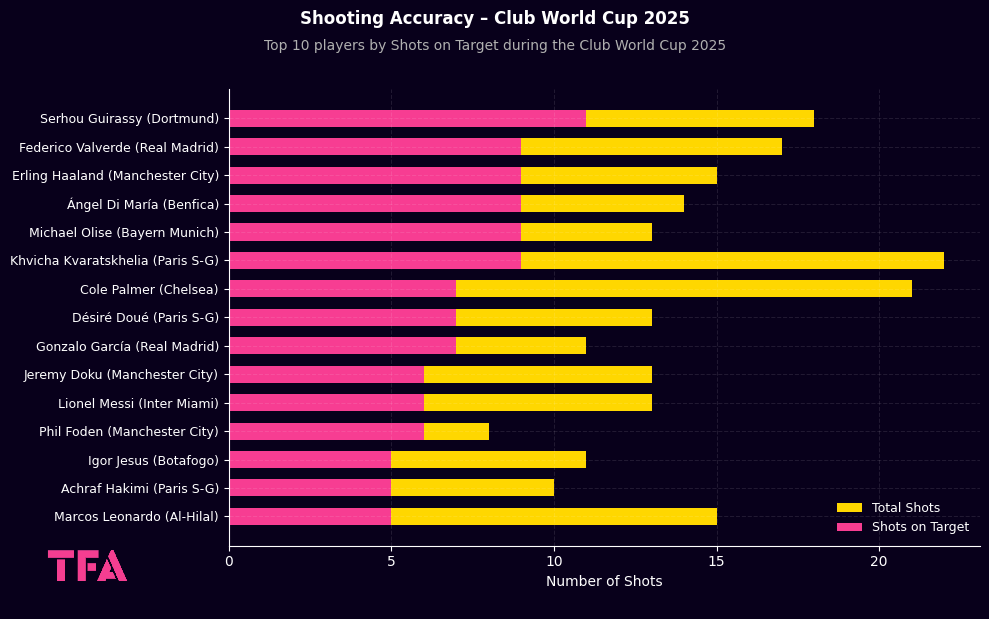

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

df_top1 = df3.copy()
df_top1 = df_top1.sort_values(by='ShotsOnTarget', ascending=False).head(15).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#08001B')
ax.set_facecolor('#08001B')

bar_height = 0.6
y = np.arange(len(df_top1))

ax.barh(y, df_top1['Shots'], height=bar_height, color='#FFD700', label='Total Shots')
ax.barh(y, df_top1['ShotsOnTarget'], height=bar_height, color='#F73D92', label='Shots on Target')

ax.set_yticks(y)
ax.set_yticklabels([f"{p} ({t})" for p, t in zip(df_top1['Player'], df_top1['Squad'])], fontsize=9, color='white')

ax.set_xlabel('Number of Shots', color='white')
ax.invert_yaxis()
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.grid(color='white', linestyle='--', alpha=0.1)
ax.legend(loc='lower right', frameon=False, fontsize=9, labelcolor='white')

plt.suptitle("Shooting Accuracy – Club World Cup 2025",
             color='white', fontsize=12, weight='bold', y=0.99)

plt.text(0.5, 0.93,
         "Top 10 players by Shots on Target during the Club World Cup 2025",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.189)
    ab = AnnotationBbox(imagebox, (0.14, 0.00087), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()
